In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

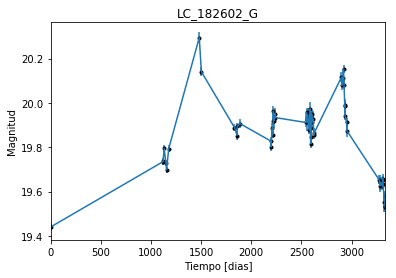

In [2]:
data = np.genfromtxt('LC_182602_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_182602_G')
plt.savefig("LC_182602_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

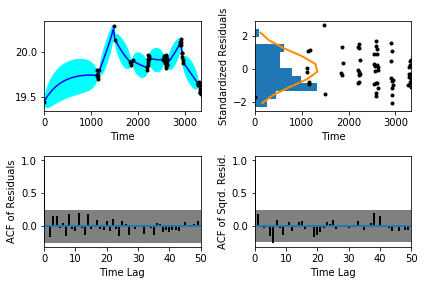

In [5]:
sample.assess_fit()

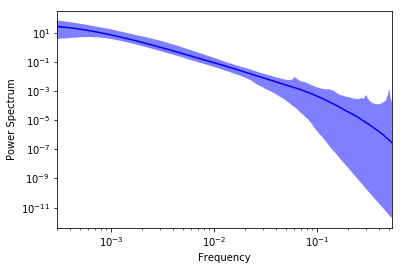

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

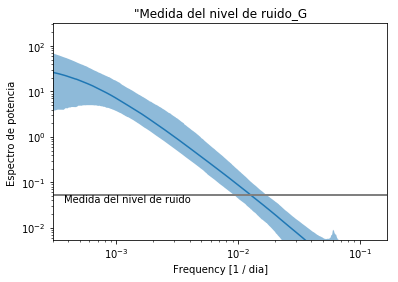

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_182602_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_182602_G')

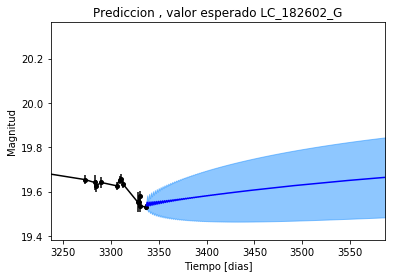

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_182602_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_182602_G')

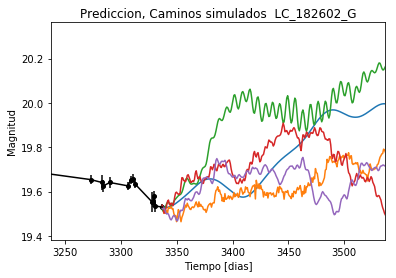

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_182602_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


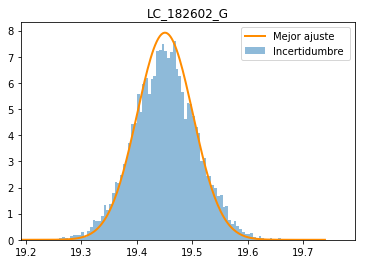

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_182602_G')
plt.savefig("Mejor_ajuste_LC_182602_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_182602_G')

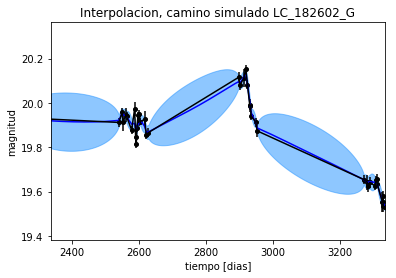

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_G')

Text(0.5,1,'Interpolacion, camino simulado LC_182602_G')

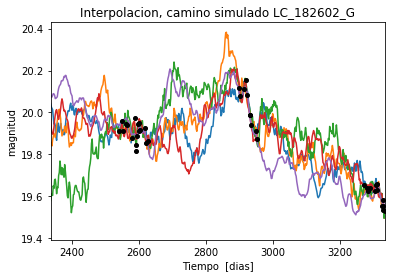

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 587.931207792
Median: 0.0373583287732
Standard deviation: 0.208782077602
68% credibility interval: [ 0.00275695  0.25871236]
95% credibility interval: [  5.75909250e-04   8.44639903e-01]
99% credibility interval: [  3.33212573e-04   1.00283997e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 385.273973599
Median: 0.0233397520586
Standard deviation: 0.162725093865
68% credibility interval: [ 0.00134042  0.1592962 ]
95% credibility interval: [  3.66611098e-04   6.54898800e-01]
99% credibility interval: [  3.11256845e-04   9.18817754e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 559.727215248
Median: 0.101920372929
St

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 946.024378727
Median: 120.900638548
Standard deviation: 1.82889180429
68% credibility interval: [ 118.80470733  122.26220153]
95% credibility interval: [ 116.21304892  123.12518879]
99% credibility interval: [ 114.19030795  123.78718568]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 225.53478727
Median: 1.58256462262
Standard deviation: 2.89833193746
68% credibility interval: [ 0.27980788  5.77121875]
95% credibility interval: [  0.07080515  10.18844914]
99% credibility interval: [  0.02213804  13.20639429]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 248.053253536
Median: 7.69095769606
Standard deviation: 15.6397241314
68% credibility interval: [  0.62481142  29.19492985]
95% credibility interval: [  0.12644425

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1561.76039939
Median: 5.49825152491e-27
Standard deviation: 3.91721888052e+23
68% credibility interval: [  4.48169425e-99   6.72989729e-09]
95% credibility interval: [  4.78336695e-151   5.28109462e+016]
99% credibility interval: [  6.13899748e-187   9.92262568e+020]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1603.59269612
Median: 19.7889740479
Standard deviation: 0.113889217943
68% credibility interval: [ 19.66810203  19.88682942]
95% credibility interval: [ 19.53562838  19.98408616]
99% credibility interval: [ 19.43593182  20.05748831]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 622.216809939
Median: 0.285059471806
Standard deviation: 0.321152583818
68% credibility interval: [ 0.02838255  0.76072732]
95% credibility interval: [ 0.          1.01293964]
99% credibility interval: [ 0.          1.05867125]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 622.216809939
Median: 0.285059471806
Standard deviation: 0.321152583818
68% credibility interval: [ 0.02838255  0.76072732]
95% credibility interval: [ 0.          1.01293964]
99% credibility interval: [ 0.          1.05867125]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1510.79385566
Median: 0.0
Standard deviation: 0.000294338835205
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 946.024378727
Median: 120.900638548
Standard deviation: 1.82889180429
68% credibility interval: [ 118.80470733  122.26220153]
95% credibility interval: [ 116.21304892  123.12518879]
99% credibility interval: [ 114.19030795  123.78718568]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 807.511089288
Median: 0.0569059656679
Standard deviation: 0.0347599741287
68% credibility interval: [ 0.03769452  0.08697381]
95% credibility interval: [ 0.02628617  0.13620995]
99% credibility interval: [ 0.02167194  0.1998192 ]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 803.730648433
Median: 1.06511253978
Standard deviation: 0.219614406462
68% credibility interval: [ 0.87897067  1.3105433 ]
95% credibility interval: [ 0.74419347  1.59183859]
99% credibility interval: [ 0.66707205  1.78811575]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 420.290282162
Median: 0.0457229792057
Standard deviation: 0.553968527533
68% credibility interval: [ 0.00077532  0.3905609 ]
95% credibility interval: [  4.61433338e-18   1.89896206e+00]
99% credibility interval: [  7.91139686e-23   3.58744014e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 587.931207792
Median: (-0.234729302448-4.54109078143j)
Standard deviation: 2.40678754564
68% credibility interval: [-1.62553770-6.24789015j -0.01732241-5.90381843j]
95% credibility interval: [ -5.30702903e+00-4.46787549j  -3.61854454e-03-4.43188028j]
99% credibility interval: [ -6.30102937e+00+0.j         -2.09363634e-03-5.3935443j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 385.273973599
Median: (-0.146647987208+0.484991790593j)
Standard deviation: 2.26210760909
68% credibility interval: [-1.00088754+0.98318767j -0.00842210+0.18368019j]
95% credibility interval: [ -4.11485052e+00+5.31798216j  -2.30348547e-03+0.j        ]
99% credibility interval: [ -5.77310221e+00+5.42934831j  -1.95568444e-03+3.19645144j]
Posteri